In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, accuracy_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


plt.ioff()

In [26]:
## 1. Data Assessment and Exploratory Analysis

### Data Loading and Cleaning. We start by loading the data and checking for missing values, data types, and overall shape.


In [27]:
def load_and_clean_data(file_path: str, sep: str = ";") -> pd.DataFrame:
    data = pd.read_csv(file_path, sep=sep)
    for col in data.columns[:-1]:
        data[col] = data[col].astype(float)
    # Report and remove missing
    print(data.info())
    print("Missing values per column:\n", data.isnull().sum())
    data = data.dropna()
    print(f"Final data shape: {data.shape}")
    return data

file_path = "C:/Users/piotr/Desktop/Studja/Wizualizacja i eksploracja danych biznesowych - C/Visualisation - Python/winequality-white.csv"
data = load_and_clean_data(file_path)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4897 non-null   float64
 2   citric acid           4897 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4897 non-null   float64
 5   free sulfur dioxide   4897 non-null   float64
 6   total sulfur dioxide  4896 non-null   float64
 7   density               4895 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4897 non-null   float64
dtypes: float64(12)
memory usage: 459.3 KB
None
Missing values per column:
 fixed acidity           0
volatile acidity        1
citric acid             1
residual sugar          0

In [28]:
### Variable Distributions and Data Shape. We use histograms, KDE plots, boxplots, and a correlation heatmap to understand variable distributions, outliers, and correlations.


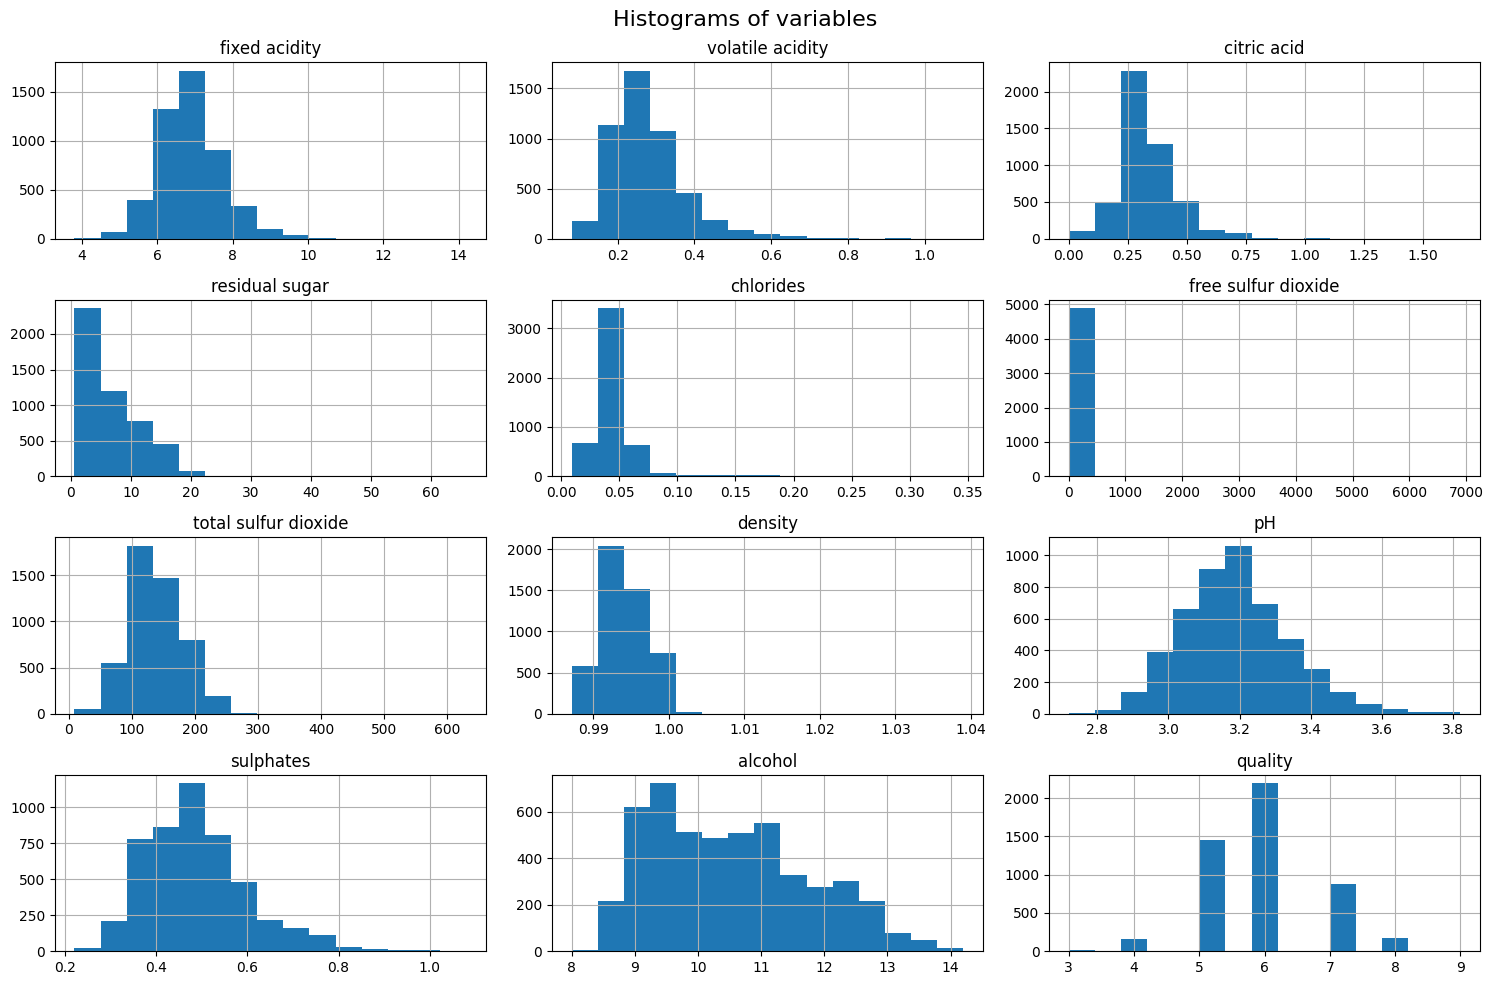

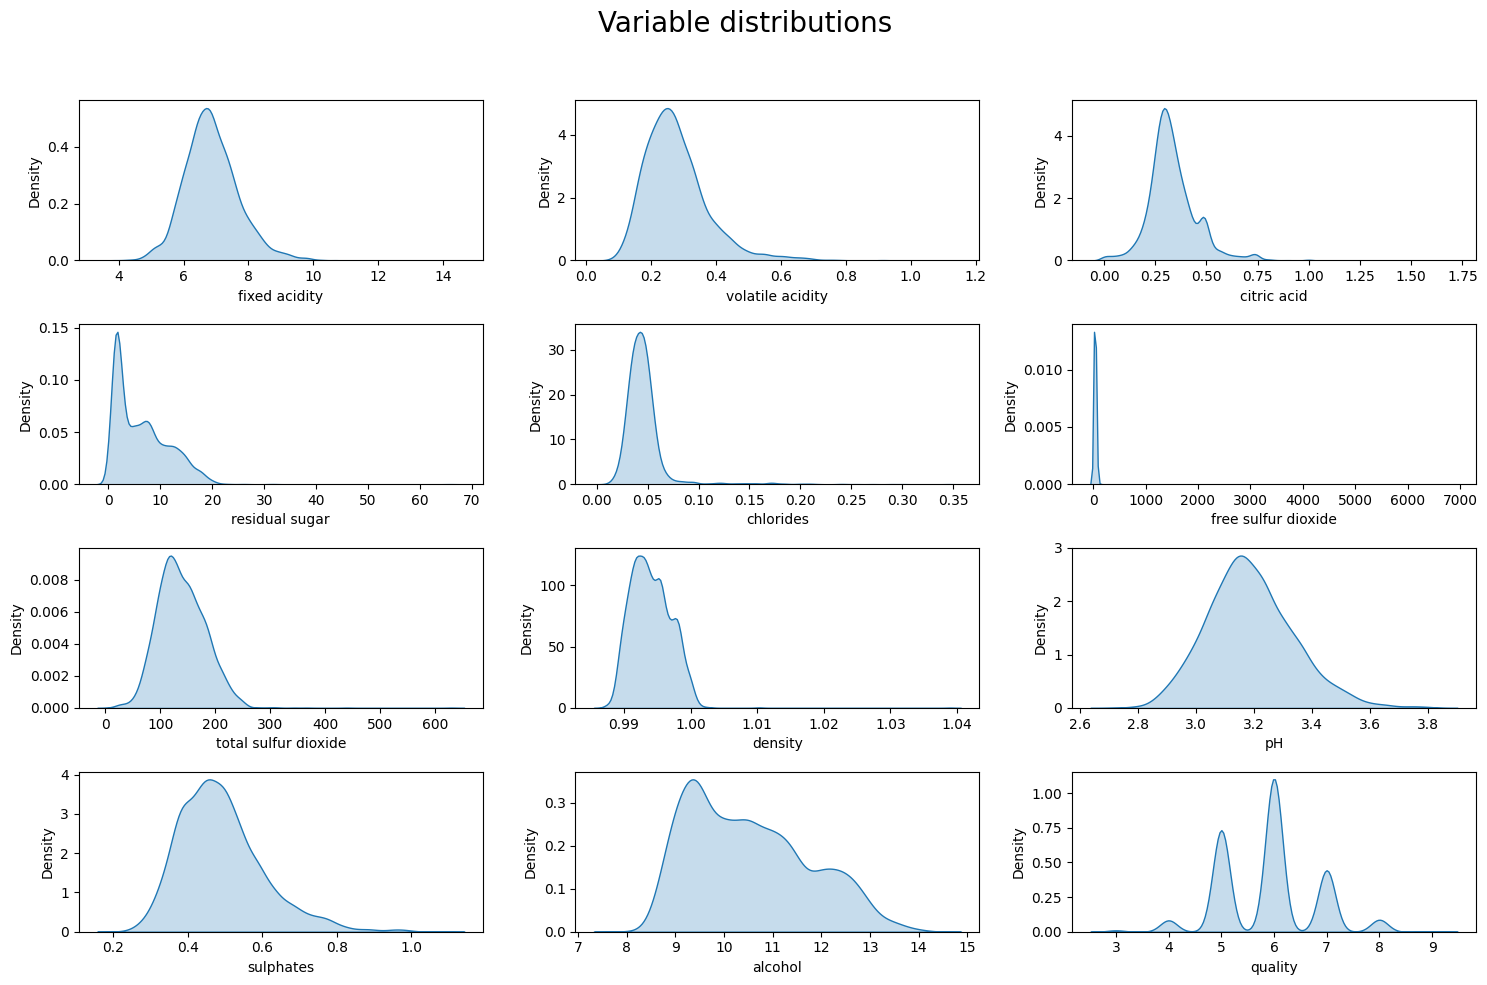

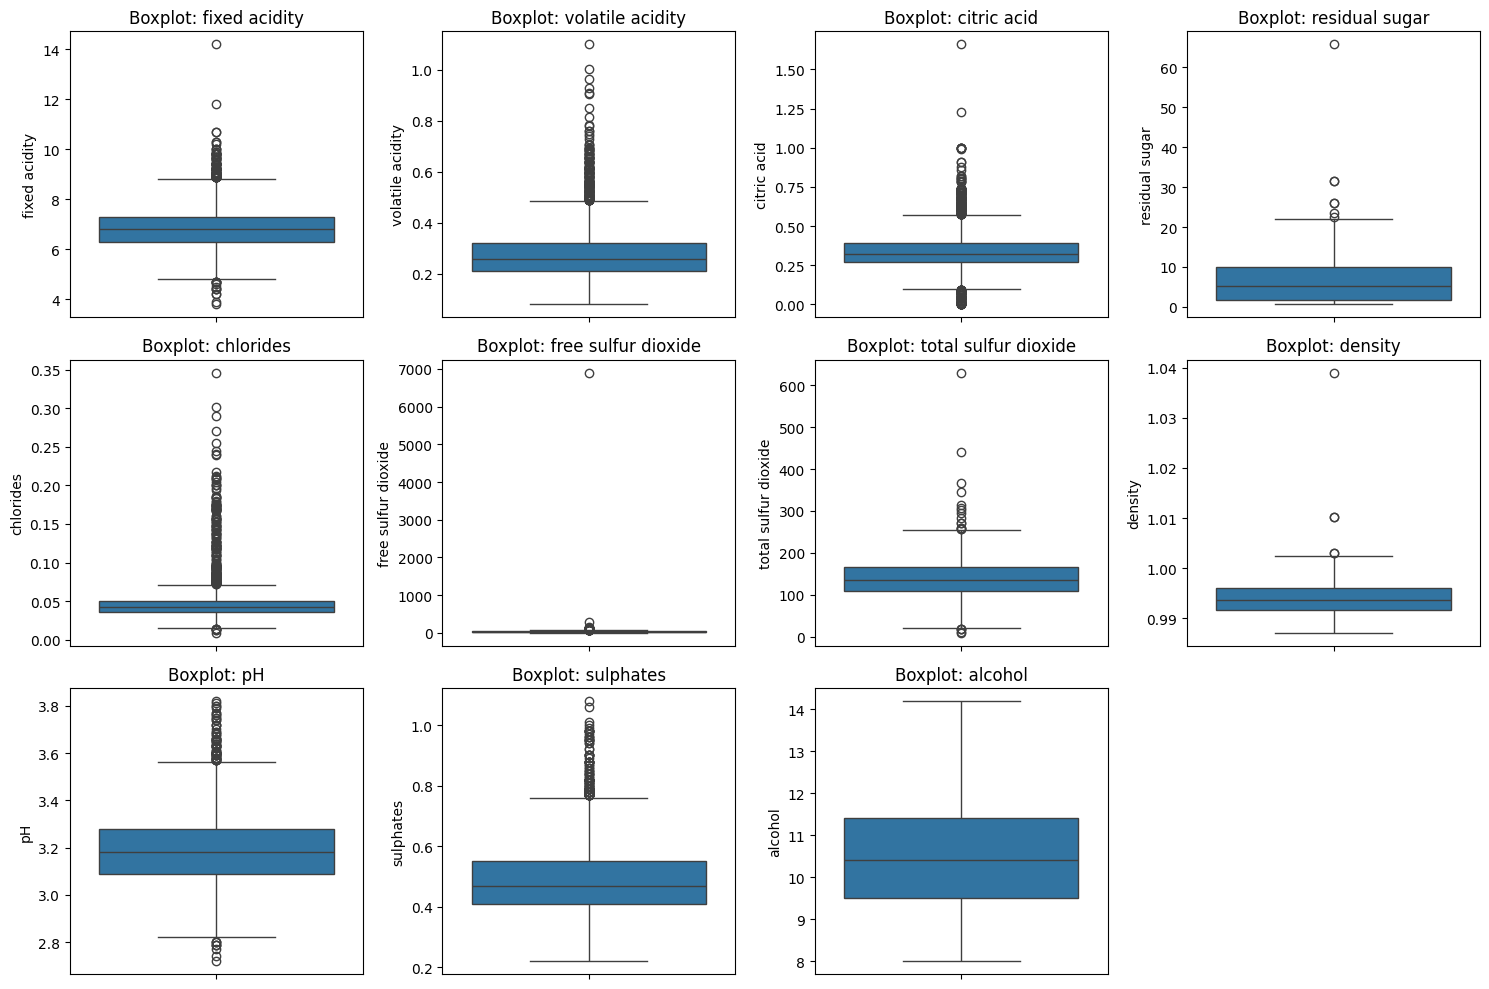

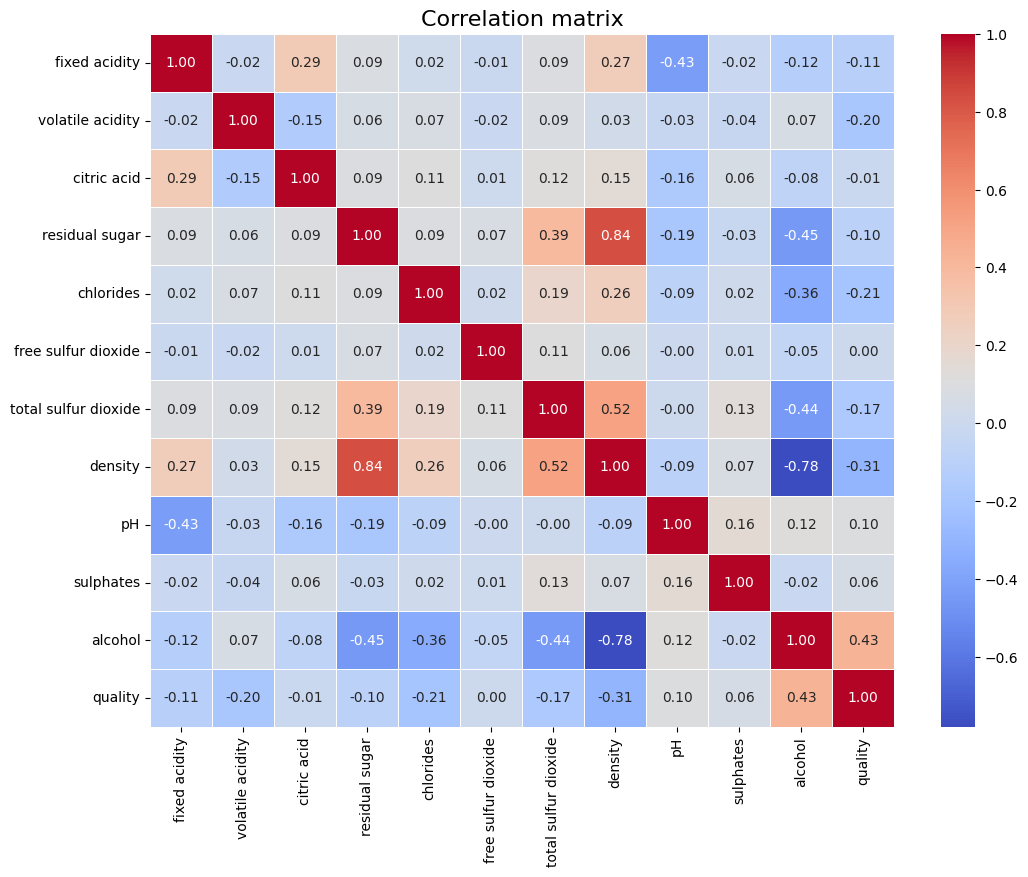

In [29]:
def visualize_data_distribution(data: pd.DataFrame):
    data.hist(bins=15, layout=(4, 3), figsize=(15, 10))
    plt.suptitle("Histograms of variables", fontsize=16)
    plt.tight_layout()
    plt.show()
    plt.close()

    plt.figure(figsize=(15, 10))
    for i, column in enumerate(data.columns):
        plt.subplot(4, 3, i + 1)
        sns.kdeplot(data[column], fill=True)
        plt.xlabel(column)
        plt.ylabel("Density")
    plt.suptitle("Variable distributions", fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Boxplots for each variable
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(data.columns[:-1], 1):
        plt.subplot(3, 4, i)
        sns.boxplot(y=data[column])
        plt.title(f'Boxplot: {column}')
    plt.tight_layout()
    plt.show()

    # Correlation matrix
    plt.figure(figsize=(12, 9))
    sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation matrix", fontsize=16)
    plt.show()

visualize_data_distribution(data)

In [30]:
### Preparing Training and Test Data. 
# We'll split our dataset into a training set (80%) and a test set (20%).


In [31]:

X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
## 2. Classification Models

### We'll model wine quality as a classification problem using:
# - Decision Tree Classifier: constructs a tree-like model of decisions.
# - k-Nearest Neighbors: classifies based on the majority class among k-nearest samples.


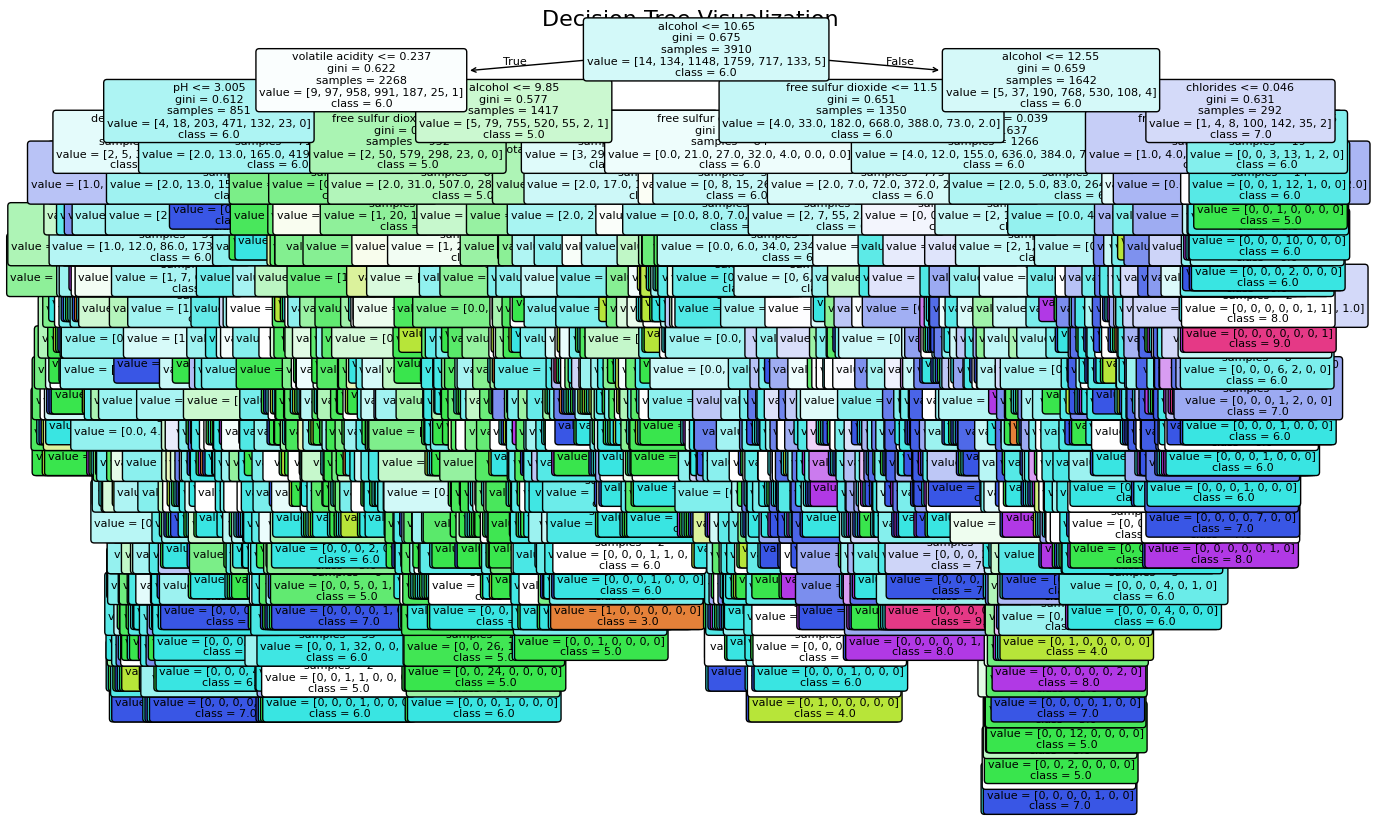


Decision Tree - classification report:
               precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         6
         4.0       0.22      0.28      0.25        29
         5.0       0.65      0.62      0.63       306
         6.0       0.64      0.63      0.63       435
         7.0       0.54      0.56      0.55       163
         8.0       0.41      0.46      0.43        39
         9.0       0.00      0.00      0.00         0

    accuracy                           0.60       978
   macro avg       0.35      0.36      0.36       978
weighted avg       0.60      0.60      0.60       978



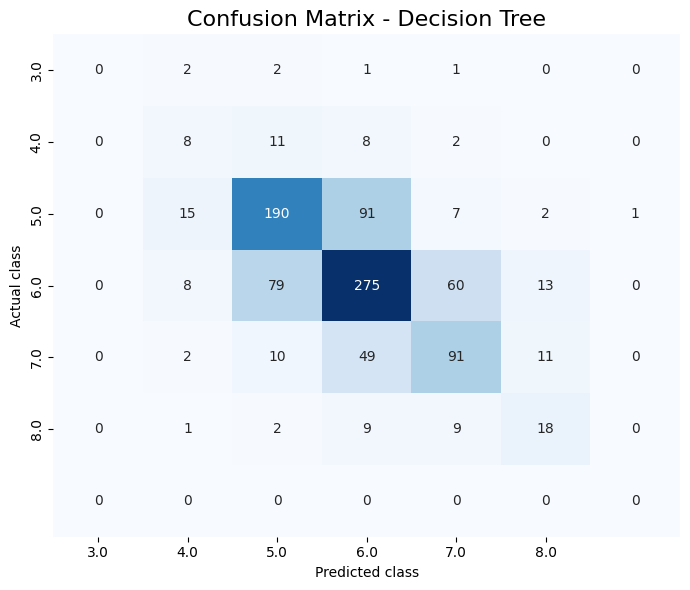


k-NN - classification report:
               precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         6
         4.0       0.14      0.10      0.12        29
         5.0       0.54      0.57      0.55       306
         6.0       0.59      0.65      0.62       435
         7.0       0.52      0.45      0.49       163
         8.0       0.36      0.10      0.16        39

    accuracy                           0.55       978
   macro avg       0.36      0.31      0.32       978
weighted avg       0.54      0.55      0.54       978



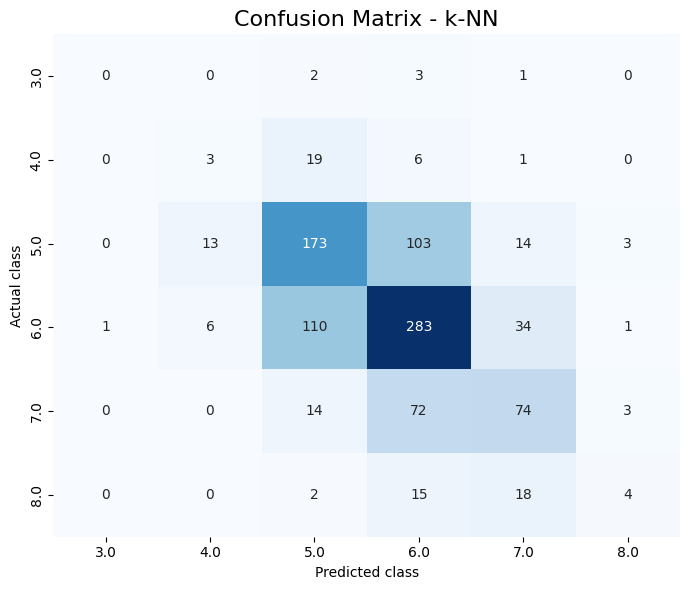

In [33]:

def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(7, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, cbar=False)
    plt.title(title, fontsize=16)
    plt.xlabel("Predicted class")
    plt.ylabel("Actual class")
    plt.tight_layout()
    plt.show()

def train_classifiers(X_train, X_test, y_train, y_test):
    tree_model = DecisionTreeClassifier(random_state=42)
    tree_model.fit(X_train, y_train)
    y_pred_tree = tree_model.predict(X_test)
    # Plot tree
    plt.figure(figsize=(15, 10))
    plot_tree(tree_model, feature_names=X_train.columns, class_names=[str(i) for i in np.unique(y_train)],
              filled=True, fontsize=8, rounded=True)
    plt.title("Decision Tree Visualization", fontsize=16)
    plt.show()
    print("\nDecision Tree - classification report:\n", classification_report(y_test, y_pred_tree, zero_division=0))
    cm_tree = confusion_matrix(y_test, y_pred_tree)
    plot_confusion_matrix(cm_tree, np.unique(y_test), "Confusion Matrix - Decision Tree")
    dt_acc = accuracy_score(y_test, y_pred_tree)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train_scaled, y_train)
    y_pred_knn = knn_model.predict(X_test_scaled)
    print("\nk-NN - classification report:\n", classification_report(y_test, y_pred_knn, zero_division=0))
    cm_knn = confusion_matrix(y_test, y_pred_knn)
    plot_confusion_matrix(cm_knn, np.unique(y_test), "Confusion Matrix - k-NN")
    knn_acc = accuracy_score(y_test, y_pred_knn)
    return tree_model, knn_model, dt_acc, knn_acc

tree_model, knn_model, dt_acc, knn_acc = train_classifiers(X_train, X_test, y_train, y_test)

In [34]:
### Learning Curves

# Comparing model performance as training size grows.

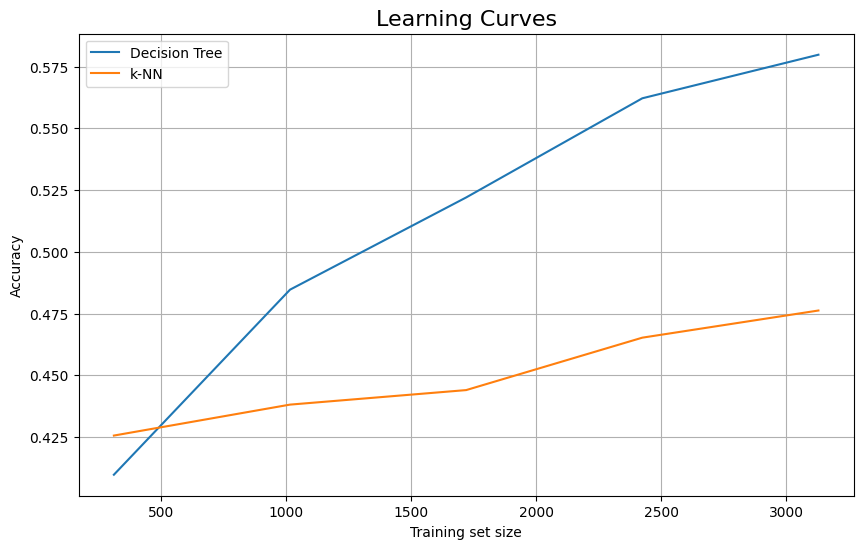

In [35]:

def plot_learning_curves(models, X_train, y_train):
    plt.figure(figsize=(10, 6))
    for model_name, model in models.items():
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
        )
        plt.plot(train_sizes, np.mean(test_scores, axis=1), label=model_name)
    plt.title("Learning Curves", fontsize=16)
    plt.xlabel("Training set size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

plot_learning_curves({"Decision Tree": tree_model, "k-NN": knn_model}, X_train, y_train)

In [36]:
## 3. Regression Models

#Now we treat wine quality as a continuous variable and use:
# - Linear Regression: predicts a real-valued output as a linear combination of features.
# - Random Forest Regressor: ensemble of trees for robust prediction.
# Results are rounded to match the domain (integers).


Linear Regression - RMSE: 1.1390987719552412
Random Forest - RMSE: 0.6850731007521994


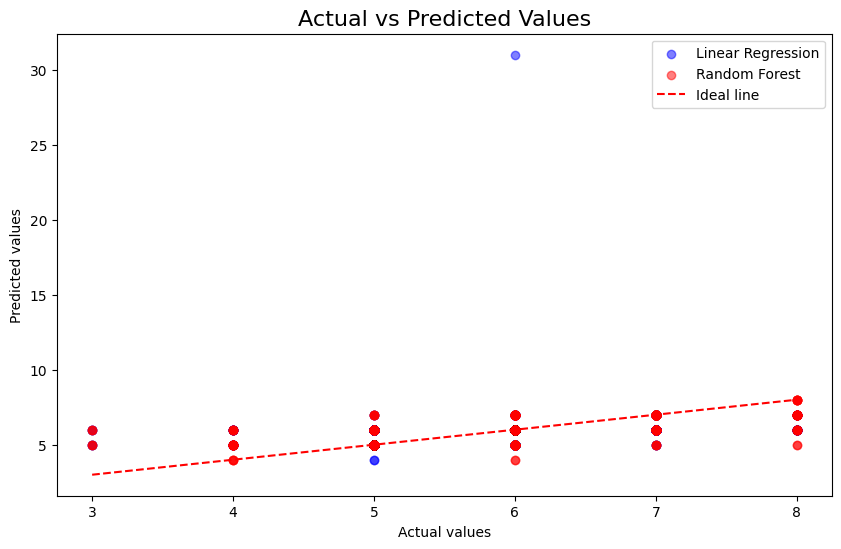

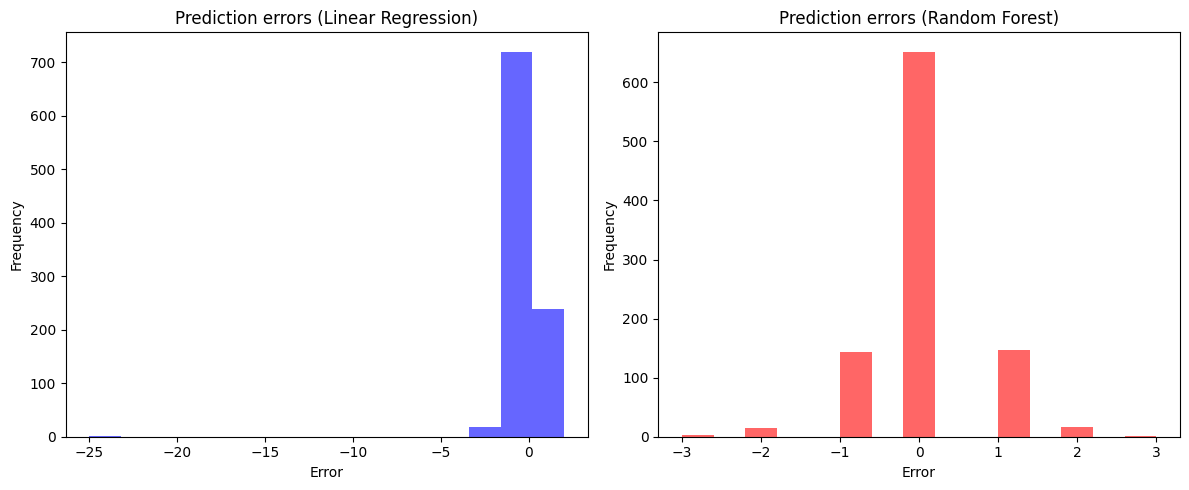

In [37]:

def train_regressors(X_train, X_test, y_train, y_test):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred_lin = lin_reg.predict(X_test)
    y_pred_lin_rounded = np.round(y_pred_lin)

    lin_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin_rounded))
    print("\nLinear Regression - RMSE:", lin_rmse)

    rf_reg = RandomForestRegressor(random_state=42)
    rf_reg.fit(X_train, y_train)
    y_pred_rf = rf_reg.predict(X_test)
    y_pred_rf_rounded = np.round(y_pred_rf)
    rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf_rounded))
    print("Random Forest - RMSE:", rf_rmse)

    # Scatter: real vs. predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_lin_rounded, alpha=0.5, label="Linear Regression", color="blue")
    plt.scatter(y_test, y_pred_rf_rounded, alpha=0.5, label="Random Forest", color="red")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Ideal line")
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.legend()
    plt.title("Actual vs Predicted Values", fontsize=16)
    plt.show()

    # Error histograms
    errors_lin = y_test - y_pred_lin_rounded
    errors_rf = y_test - y_pred_rf_rounded
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(errors_lin, bins=15, color="blue", alpha=0.6)
    plt.title("Prediction errors (Linear Regression)")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.subplot(1, 2, 2)
    plt.hist(errors_rf, bins=15, color="red", alpha=0.6)
    plt.title("Prediction errors (Random Forest)")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    return lin_reg, rf_reg, lin_rmse, rf_rmse

lin_reg, rf_reg, lin_rmse, rf_rmse = train_regressors(X_train, X_test, y_train, y_test)

In [38]:
## 4. Model Comparison

# We'll summarize both classifier (accuracy) and regression (RMSE) performance.

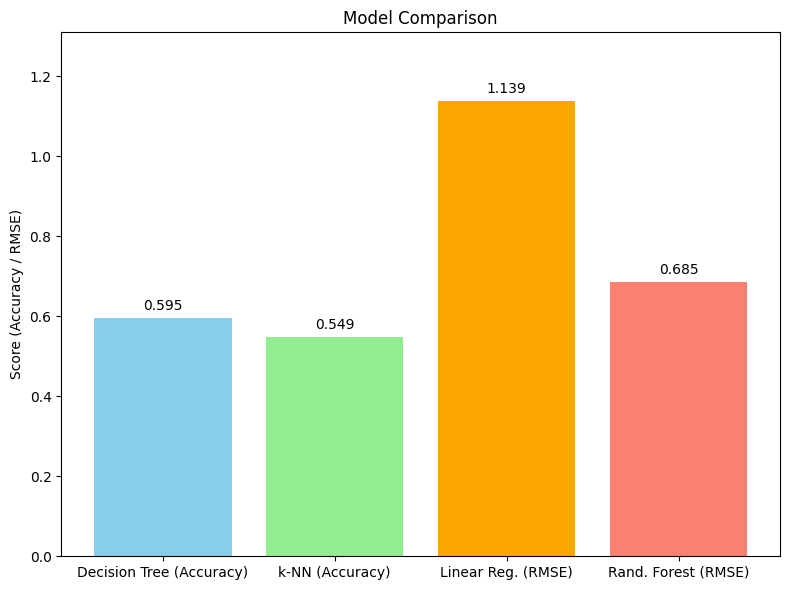

In [39]:

def compare_models(dt_acc, knn_acc, lin_rmse, rf_rmse):
    fig, ax1 = plt.subplots(figsize=(8, 6))
    metrics = ['Decision Tree (Accuracy)', 'k-NN (Accuracy)', 'Linear Reg. (RMSE)', 'Rand. Forest (RMSE)']
    scores = [dt_acc, knn_acc, lin_rmse, rf_rmse]
    colors = ['skyblue', 'lightgreen', 'orange', 'salmon']
    ax1.bar(metrics, scores, color=colors)
    ax1.set_title('Model Comparison')
    for i, v in enumerate(scores):
        ax1.text(i, v + 0.02, f"{v:.3f}", ha='center', fontsize=10)
    if max(scores) > 1:
        ax1.set_ylim([0, max(scores) * 1.15])
    plt.ylabel("Score (Accuracy / RMSE)")
    plt.tight_layout()
    plt.show()

compare_models(dt_acc, knn_acc, lin_rmse, rf_rmse)

In [40]:
## 5. Clustering

# We'll use KMeans and Agglomerative Clustering to form feature-based groups, visualize results (PCA), and compare group profiles.

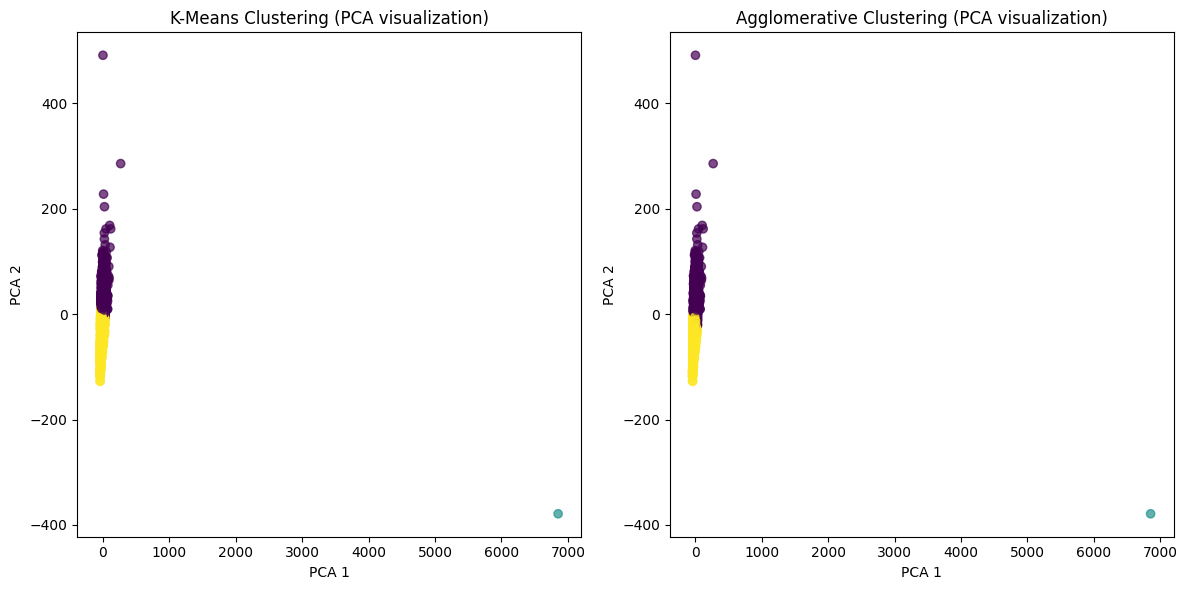

KMeans cluster profiles:


cluster_kmeans,0,1,2
fixed acidity,6.949618,6.80000,6.786162
volatile acidity,0.285253,0.27000,0.272741
citric acid,0.350731,0.30000,0.321858
residual sugar,8.516189,13.00000,4.802023
chlorides,0.050493,0.04700,0.042170
free sulfur dioxide,46.103629,6900.00000,27.173290
total sulfur dioxide,178.276027,160.00000,108.607053
density,0.995691,0.99705,0.992780
pH,3.187335,3.16000,3.188836
sulphates,0.503906,0.50000,0.479463



Agglomerative cluster profiles:


cluster_agg,0,1,2
fixed acidity,6.917087,6.80000,6.788220
volatile acidity,0.280574,0.27000,0.275342
citric acid,0.346474,0.30000,0.320559
residual sugar,8.267417,13.00000,4.301234
chlorides,0.049517,0.04700,0.041515
free sulfur dioxide,44.551784,6900.00000,24.937852
total sulfur dioxide,170.224399,160.00000,102.993071
density,0.995395,0.99705,0.992501
pH,3.187362,3.16000,3.189121
sulphates,0.499057,0.50000,0.479753


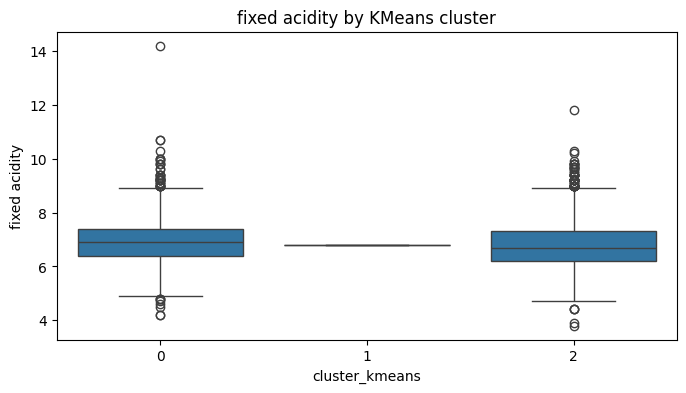

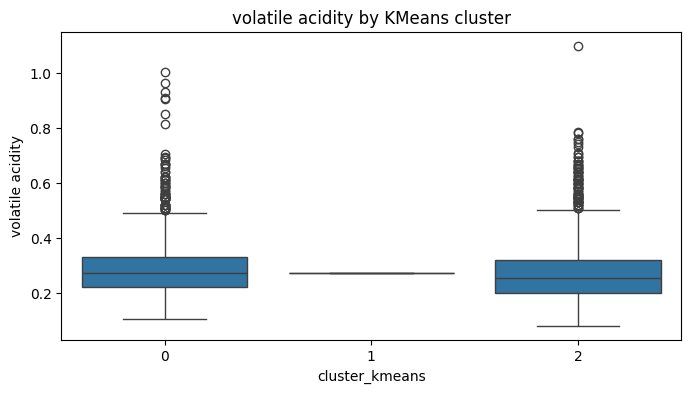

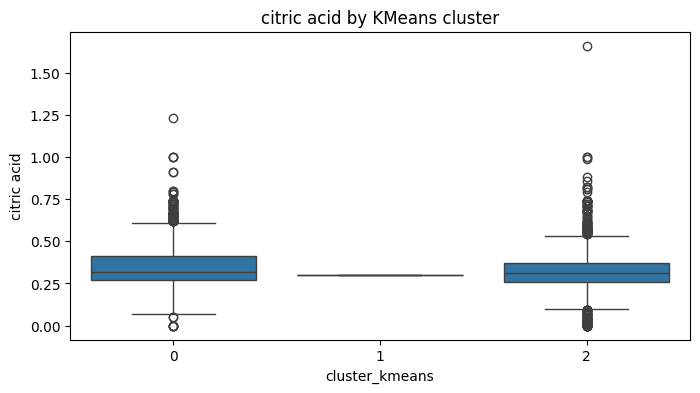

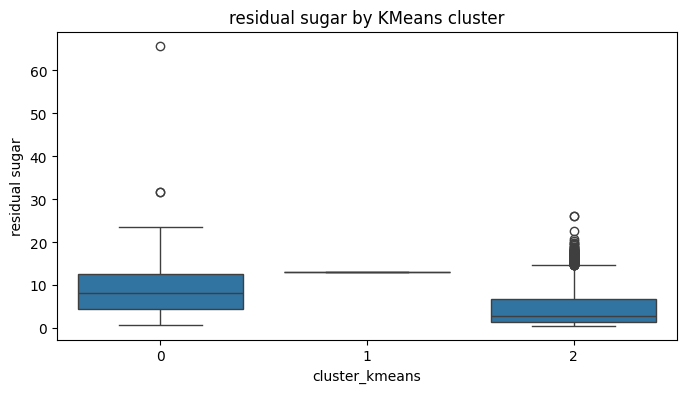

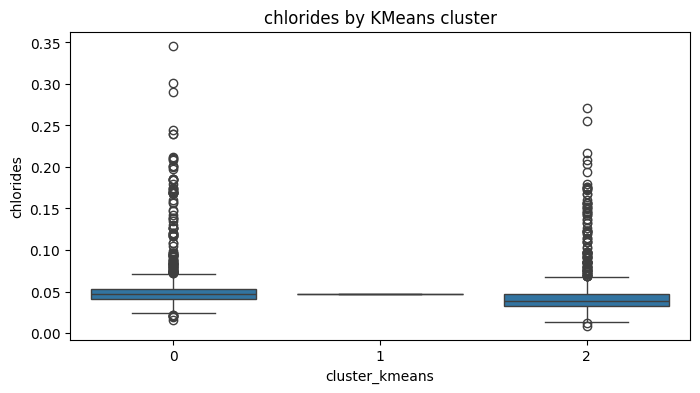

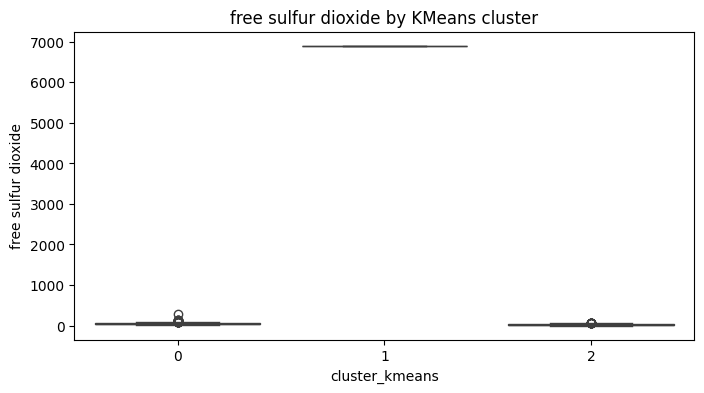

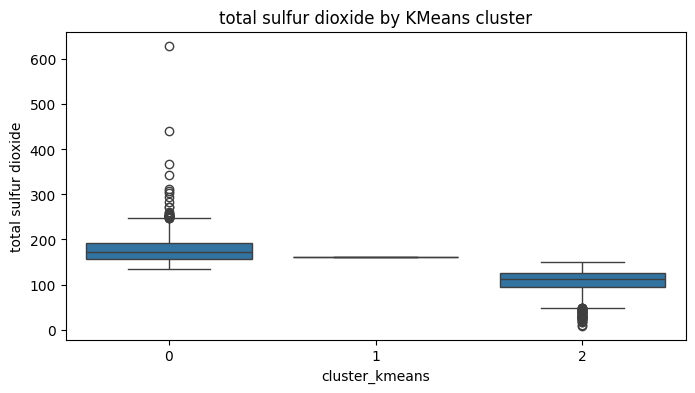

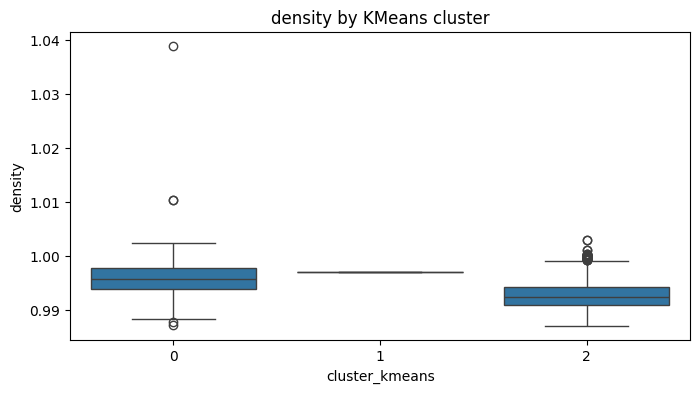

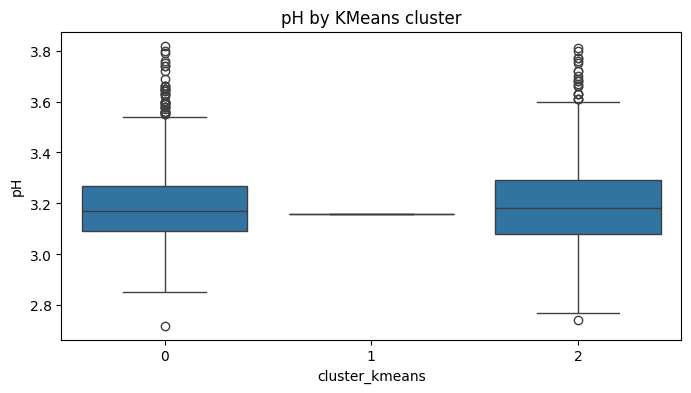

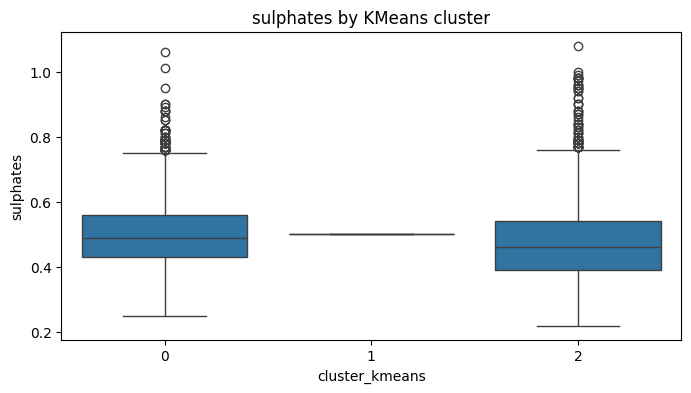

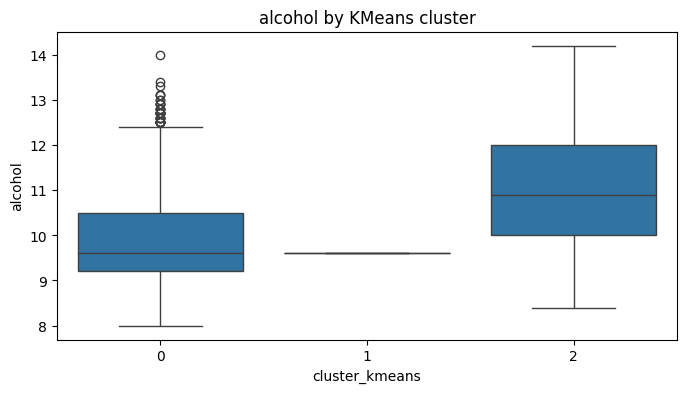

In [41]:

def cluster_data(X, data, n_clusters=3):
    # PCA for 2D reduction
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)

    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters_kmeans = kmeans.fit_predict(X)

    # Agglomerative Clustering
    agg_clust = AgglomerativeClustering(n_clusters=n_clusters)
    clusters_agg = agg_clust.fit_predict(X)

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters_kmeans, cmap="viridis", alpha=0.7)
    plt.title("K-Means Clustering (PCA visualization)")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.subplot(1, 2, 2)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters_agg, cmap="viridis", alpha=0.7)
    plt.title("Agglomerative Clustering (PCA visualization)")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.tight_layout()
    plt.show()

    # Cluster labeling for profiling
    data['cluster_kmeans'] = clusters_kmeans
    data['cluster_agg'] = clusters_agg

    print("KMeans cluster profiles:")
    display(data.groupby('cluster_kmeans').mean().T)
    print("\nAgglomerative cluster profiles:")
    display(data.groupby('cluster_agg').mean().T)

    features = data.columns[:-3]  # last 3 = quality, kmeans, agg
    for var in features:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x='cluster_kmeans', y=var, data=data)
        plt.title(f"{var} by KMeans cluster")
        plt.show()

    return clusters_kmeans, clusters_agg

clusters_kmeans, clusters_agg = cluster_data(X, data, n_clusters=3)